In [140]:
!pip install openpyxl
!pip install mlxtend

**Importing libraries**

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #data visualization
from sklearn.metrics import accuracy_score #In multilabel classification, this function computes subset accuracy
from sklearn.model_selection import cross_val_score #Evaluate a score by cross-validation.
from sklearn.model_selection import GridSearchCV

**Loading data**

About the data:
1. The data has been taken from 10 different hospitals in Kerala, India.
2. It contains total 42 physical and clinical parameters to decide whether a patient has PCOS and infertility related issues.

In [196]:
#Loading the datasets

#Infertility dataset
pcos_inf = pd.read_csv("PCOS_infertility.csv")

#Dataset without infertility
pcos_woinf = pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name = "Full_new")

In [197]:
pcos_inf.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [198]:
pcos_woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


In [199]:
pcos_inf.shape

(541, 6)

In [200]:
pcos_woinf.shape

(541, 45)

Both the datasets have 541 rows. Now, merging the dataset containing the infertility and without infertility information will give us a complete dataset with the infertility information of the patients combined.

To do so, sorting both the datatset.

**Data Processing**

In [201]:
#Sorting the dataset based on the Patient file number
sorted_pcos_inf = pcos_inf.sort_values(by = ["Patient File No."], ascending = True)
sorted_pcos_inf

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


In [202]:
sorted_pcos_woinf = pcos_woinf.sort_values(by = ["Patient File No."], ascending = True)
sorted_pcos_woinf

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.000,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.500,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.000,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.000,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.000,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537.0,537.0,0.0,35.0,50.0,164.592,18.500000,17.0,72.0,16.0,...,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7,NaN
537,538.0,538.0,0.0,30.0,63.2,158.000,25.300000,15.0,72.0,18.0,...,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2,NaN
538,539.0,539.0,0.0,36.0,54.0,152.000,23.400000,13.0,74.0,20.0,...,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3,NaN
539,540.0,540.0,0.0,27.0,50.0,150.000,22.200000,15.0,74.0,20.0,...,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5,NaN


In [203]:
merged_pcos_data = pd.merge(sorted_pcos_woinf, sorted_pcos_inf, on = "Patient File No.", suffixes = ('', '_extra'), how = 'left')
merged_pcos_data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,Sl. No_extra,PCOS (Y/N)_extra,I beta-HCG(mIU/mL)_extra,II beta-HCG(mIU/mL)_extra,AMH(ng/mL)_extra
0,1.0,1.0,0.0,28.0,44.6,152.000,19.300000,15.0,78.0,22.0,...,3.0,18.0,18.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,0.0,36.0,65.0,161.500,24.921163,15.0,74.0,20.0,...,5.0,15.0,14.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3.0,1.0,33.0,68.8,165.000,25.270891,11.0,72.0,18.0,...,15.0,18.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,0.0,37.0,65.0,148.000,29.674945,13.0,72.0,20.0,...,2.0,15.0,14.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,0.0,25.0,52.0,161.000,20.060954,11.0,72.0,18.0,...,4.0,16.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537.0,537.0,0.0,35.0,50.0,164.592,18.500000,17.0,72.0,16.0,...,0.0,17.5,10.0,6.7,NaN,NaN,NaN,NaN,NaN,NaN
537,538.0,538.0,0.0,30.0,63.2,158.000,25.300000,15.0,72.0,18.0,...,7.0,19.0,18.0,8.2,NaN,NaN,NaN,NaN,NaN,NaN
538,539.0,539.0,0.0,36.0,54.0,152.000,23.400000,13.0,74.0,20.0,...,0.0,18.0,9.0,7.3,NaN,NaN,NaN,NaN,NaN,NaN
539,540.0,540.0,0.0,27.0,50.0,150.000,22.200000,15.0,74.0,20.0,...,6.0,18.0,16.0,11.5,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
#There are some extra columns due to the merging of the datasets which needs to be dropped
dropped_pcos = merged_pcos_data.drop(['Unnamed: 44', 'Sl. No_extra', 'PCOS (Y/N)_extra', 
                                      '  I   beta-HCG(mIU/mL)_extra',
                                      'II    beta-HCG(mIU/mL)_extra', 
                                      'AMH(ng/mL)_extra'], axis=1)
dropped_pcos.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0


In [205]:
dropped_pcos.shape

(541, 44)

In [206]:
#Now to check the type of data present in the columns
dropped_pcos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

In [207]:
#Since two of the columns have object type data, that needs to be converted into numeric
dropped_pcos["AMH(ng/mL)"] = pd.to_numeric(dropped_pcos["AMH(ng/mL)"], errors='coerce')
dropped_pcos["II    beta-HCG(mIU/mL)"] = pd.to_numeric(dropped_pcos["II    beta-HCG(mIU/mL)"], errors='coerce')

In [208]:
dropped_pcos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

In [209]:
#Now checking for the NaN values
dropped_pcos.isnull().values.any()

True

In [210]:
dropped_pcos.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [211]:
dropped_pcos.shape

(541, 44)

In [212]:
#Since there is only 1 NaN value in Marriage Status, II Beta-HCG, AMH each and Fast food those rows can be removed.
dropped_pcos_NaN = dropped_pcos.dropna()
dropped_pcos_NaN

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1.0,1.0,0.0,28.0,44.6,152.000,19.300000,15.0,78.0,22.0,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,2.0,2.0,0.0,36.0,65.0,161.500,24.921163,15.0,74.0,20.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,3.0,3.0,1.0,33.0,68.8,165.000,25.270891,11.0,72.0,18.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,4.0,4.0,0.0,37.0,65.0,148.000,29.674945,13.0,72.0,20.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,5.0,5.0,0.0,25.0,52.0,161.000,20.060954,11.0,72.0,18.0,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537.0,537.0,0.0,35.0,50.0,164.592,18.500000,17.0,72.0,16.0,...,0.0,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7
537,538.0,538.0,0.0,30.0,63.2,158.000,25.300000,15.0,72.0,18.0,...,0.0,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2
538,539.0,539.0,0.0,36.0,54.0,152.000,23.400000,13.0,74.0,20.0,...,0.0,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3
539,540.0,540.0,0.0,27.0,50.0,150.000,22.200000,15.0,74.0,20.0,...,1.0,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5


In [213]:
dropped_pcos_NaN.shape #four rows were dropped which contained NaN values

(537, 44)

**Exploratory Data Analysis**

In [214]:
#Looking at the stats of all features
dropped_pcos_NaN.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,...,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,271.070764,271.070764,0.325885,31.435754,59.680633,156.492171,24.327726,13.800745,73.249534,19.238361,...,0.491620,0.515829,0.243948,114.659218,76.960894,6.113594,6.635009,15.008939,15.445754,8.469963
std,156.475961,156.475961,0.469141,5.406608,11.028685,6.041379,4.059454,1.845567,4.445894,1.689238,...,0.500396,0.500215,0.429862,7.374148,5.569134,4.226796,4.443774,3.568414,3.325234,2.160065
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.707923,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.600000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.666667,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


/var/folders/9x/p6zyw9s17j1__6myq7yrc0f80000gn/T/ipykernel_24885/64290063.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat, dtype = np.bool)


<function matplotlib.pyplot.show(close=None, block=None)>

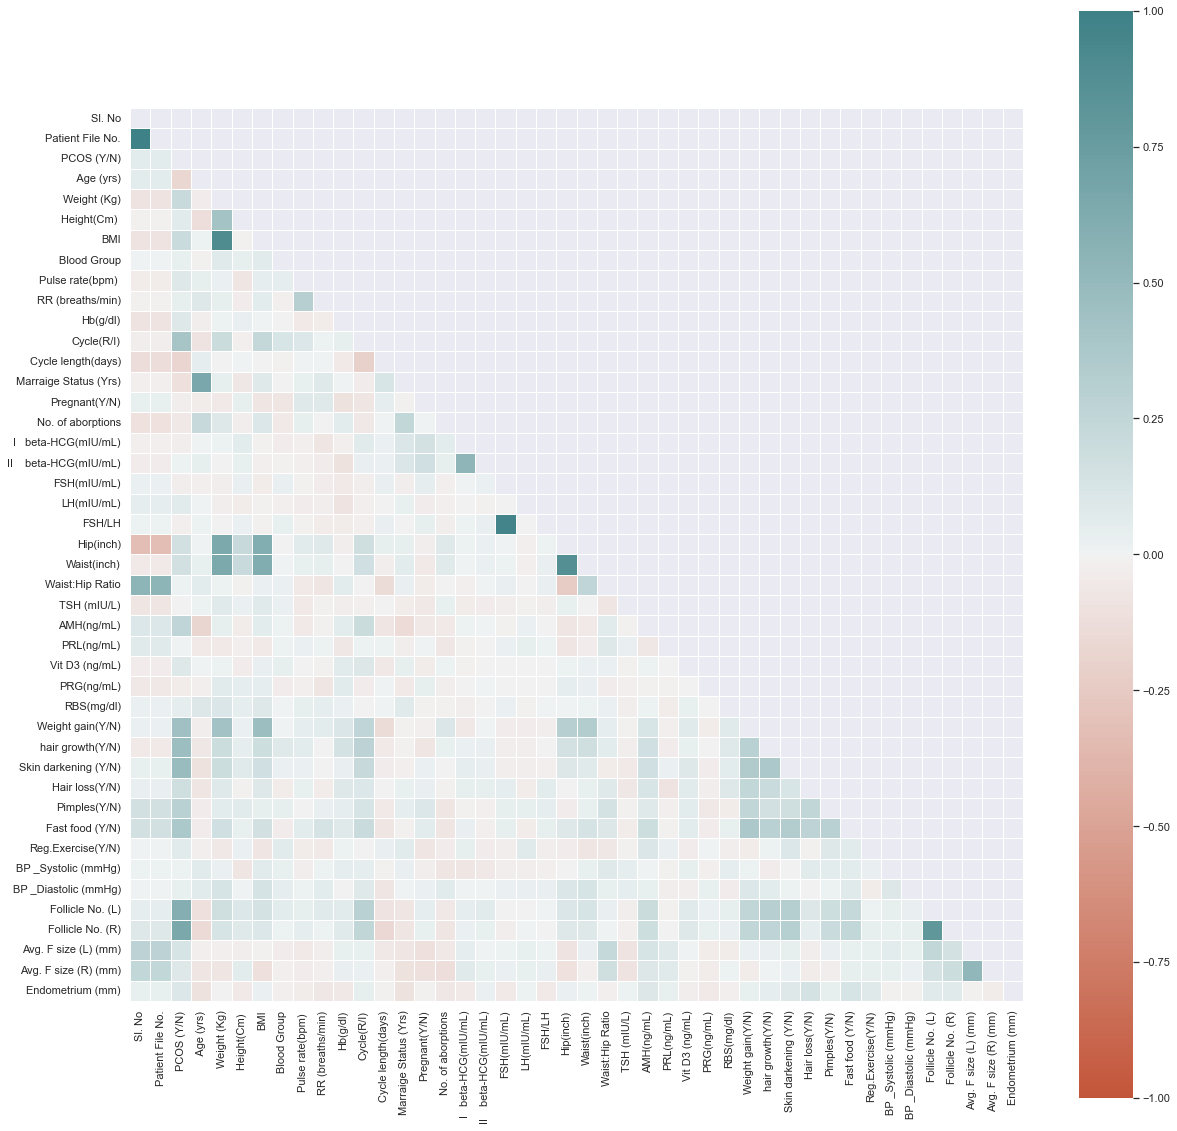

In [215]:
#Creating a correlation matrix for all the features
corr_mat = dropped_pcos_NaN.corr()
plt.subplots(figsize = (20, 20))

#Generating a mask for the upper triangle
mask = np.zeros_like(corr_mat, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#Creating a custom diverging colormap
cmap = sns.diverging_palette(20, 200, as_cmap = True, n = 200)

#Creating a plot
corr_map = sns.heatmap(corr_mat,
                       mask = mask,
                       cmap = cmap,
                       vmax = 1,
                       vmin = -1,
                       center = 0,
                       square = True,
                       linewidth = 0.5)
#corr_map.set_xticklabels(corr_map.get_xticklabels(),
#                        rotation = 45,
#                        horizontalalignment = 'right');
plt.show

In [216]:
#Now checking the correlation between the different features to PCOS
dropped_pcos_NaN[dropped_pcos_NaN.columns[1:]].corr()["PCOS (Y/N)"].sort_values(ascending = False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.649591
Follicle No. (L)          0.600376
Skin darkening (Y/N)      0.479234
hair growth(Y/N)          0.464201
Weight gain(Y/N)          0.441193
Cycle(R/I)                0.404407
Fast food (Y/N)           0.379460
Pimples(Y/N)              0.293782
AMH(ng/mL)                0.259442
Weight (Kg)               0.215770
BMI                       0.203884
Hair loss(Y/N)            0.174093
Waist(inch)               0.159339
Hip(inch)                 0.156394
Avg. F size (L) (mm)      0.128089
Endometrium (mm)          0.103203
Avg. F size (R) (mm)      0.093478
Pulse rate(bpm)           0.092428
Hb(g/dl)                  0.089103
Vit D3 (ng/mL)            0.086195
Height(Cm)                0.068536
Reg.Exercise(Y/N)         0.067619
LH(mIU/mL)                0.064239
Patient File No.          0.060096
RBS(mg/dl)                0.050688
RR (breaths/min)          0.040696
BP _Diastolic (mmHg)      0.037020
Blood Group         

As seen above, there are around 31 features which are positively related to PCOS and 10 features which are negatively related to PCOS.

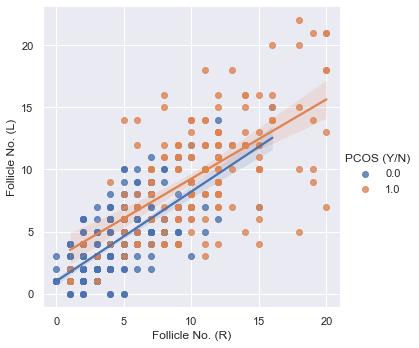

In [217]:
sns.set_style('whitegrid')
sns.set(font_scale = 1)
sns.lmplot(data = dropped_pcos_NaN, x = "Follicle No. (R)", y = "Follicle No. (L)", hue = "PCOS (Y/N)")

The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient. The number of follicles in women with PCOS is higher, as expected. And are unequal as well.

**Model Building using Random Forest Classifier**

In [218]:
#Assignment of the variables
X = dropped_pcos_NaN[["Follicle No. (R)", "Follicle No. (L)", "Skin darkening (Y/N)", "hair growth(Y/N)", "Weight gain(Y/N)", "Cycle(R/I)"]] #choosing top 6 features
y = dropped_pcos_NaN["PCOS (Y/N)"] #target

In [219]:
#Data splitting- 80% used for training and 20% for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [220]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [221]:
# Create an instance of Random Forest Classifier
Rforest = RandomForestClassifier(criterion = 'gini', n_estimators = 10, max_depth = 2, max_features = 'auto', n_jobs=-1, random_state = 2)

In [222]:
#Fitting the model
Rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10, n_jobs=-1, random_state=2)

In [223]:
#Model performance
y_pred = Rforest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.85


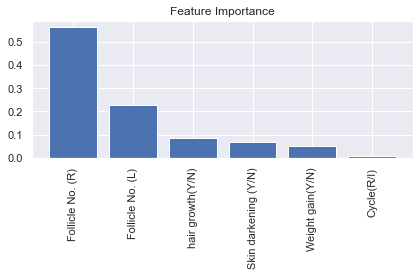

In [224]:
importances = Rforest.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = dropped_pcos_NaN.columns[1:]

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [225]:
#Classification report
from sklearn.metrics import classification_report

target_names = ["PCOS Not Detected", "PCOS Detected"]
class_rp = classification_report(y_test, y_pred, target_names = target_names)
print(class_rp)

                   precision    recall  f1-score   support

PCOS Not Detected       0.89      0.89      0.89        73
    PCOS Detected       0.77      0.77      0.77        35

         accuracy                           0.85       108
        macro avg       0.83      0.83      0.83       108
     weighted avg       0.85      0.85      0.85       108



<AxesSubplot:>

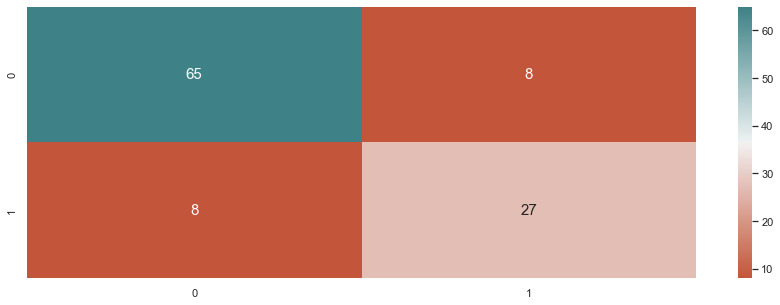

In [226]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

plt.subplots(figsize=(15,5))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, annot_kws = {'size':15}, cmap = cmap)

Hyperparameter tuning using GridSearchCV

In [227]:
param_grid = { 
    'n_estimators': [5,10, 30, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8],
    'criterion' : ['gini', 'entropy'],
    'n_jobs' : [-1, 1, 2],
    'random_state' : [0,1,2,4,5]
}

In [228]:
grid_srch = GridSearchCV(estimator = Rforest, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')
grid_srch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=2, n_estimators=10,
                                              n_jobs=-1, random_state=2),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 30, 50, 100],
                         'n_jobs': [-1, 1, 2],
                         'random_state': [0, 1, 2, 4, 5]},
             scoring='accuracy')

In [229]:
grid_srch.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 50,
 'n_jobs': -1,
 'random_state': 2}

In [230]:
#Passing the best parameters in the model
Rforest = RandomForestClassifier(criterion = 'entropy',
                                 max_depth = 6,
                                 n_estimators = 50,
                                 max_features = 'auto',
                                 random_state = 2,
                                 n_jobs = -1)

In [231]:
Rforest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=50,
                       n_jobs=-1, random_state=2)

In [232]:
y_pred = Rforest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.90
